#**ANALISIS PREDIKSI HARGA SAHAM: TINJAUAN DATA LIMA TAHUN UNTUK MEMBANTU INVESTOR MEMBUAT KEPUTUSAN YANG BIJAKSANA**

#**Import Library**

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from google.colab import files

#**BUSINESS UNDERSTANDING**

#**Business Objective**

Tujuan bisnis dalam memprediksi harga saham Netflix adalah untuk membantu investor membuat keputusan investasi yang lebih baik. Dengan memeriksa data historis, kita mencoba untuk mengatakan kepada mereka bagaimana harga saham Netflix mungkin akan berubah di masa depan.

#**Asses Situation**

Situasi bisnis yang mendasari Prediksi ini adalah Prediksi tidak selalu benar. Jadi, selain bergantung kepada hasil prediksi yang tidak pasti, investor juga perlu melakukan penelitian tambahan sebelum membuat keputusan besar. Dengan informasi yang lebih baik, mereka bisa membuat keputusan investasi yang lebih baik pula.

#**Data Mining Goals**

1) Memberikan panduan yang jelas kepada investor agar mereka dapat membuat keputusan investasi yang lebih cerdas terkait dengan saham Netflix.

2) Membangun model prediksi yang andal untuk membantu investor mengantisipasi dengan lebih baik perubahan harga saham Netflix di masa mendatang.

3) Membantu investor dalam merencanakan strategi perdagangan yang dapat meminimalkan risiko investasi dan memaksimalkan potensi keuntungan.

4) Memberikan informasi tambahan yang diperlukan kepada investor sehingga mereka dapat merasa lebih percaya diri dalam membuat keputusan investasi yang tepat.

5) Menghadirkan wawasan yang mendalam tentang faktor-faktor yang memengaruhi harga saham Netflix untuk mendukung investor dalam membuat keputusan yang lebih cerdas dan terinformasi.

#**Project Plan**

Rencana proyek mencakup beberapa langkah. Langkah awal melibatkan pengumpulan data harga saham dan data fundamental Netflix, yang kemudian dibersihkan dan diproses untuk analisis lebih lanjut. Setelah itu, dilakukan eksplorasi tren dan pola dalam data historis serta analisis faktor eksternal yang mempengaruhi harga saham. Model prediktif dipilih dan dilatih menggunakan data historis, yang kemudian divalidasi untuk meningkatkan ketepatan prediksi. Model tersebut kemudian diimplementasikan ke lingkungan produksi dan dipantau secara berkala untuk memastikan kinerjanya tetap optimal. Laporan rutin disusun untuk merangkum hasil analisis dan prediksi, serta presentasi hasil disiapkan untuk berkomunikasi dengan pemangku kepentingan perusahaan. Selain itu, manajemen risiko juga menjadi fokus dengan identifikasi dan mitigasi risiko yang terkait dengan proyek ini. Evaluasi proyek dilakukan secara berkala untuk memastikan bahwa hasilnya bermanfaat bagi perusahaan dan dapat mendukung pengambilan keputusan investasi yang lebih cerdas.

#**DATA UNDERSTANDING**

#**Collect Initial Data**

Sumber data yang saya gunakan di sini berasal dari Kaggle, yaitu dataset yang berjudul "Netflix Stock Prediction" yang tersedia pada link berikut : https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction
Dataset ini berisi data harga saham Netflix dari 5 Februari 2018 hingga 5 Februari 2022, yang dapat digunakan untuk analisis dan prediksi harga saham.

In [80]:
DATA_URL = '/content/NFLX.csv'

#**Describe Data**

#### Informasi Dasar

In [81]:
df = pd.read_csv(DATA_URL)

In [82]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


1. Date: Kolom ini berisi tanggal perdagangan.
2. Open: Harga saham Netflix pada pembukaan perdagangan pada tanggal tersebut.
3. High: Harga tertinggi yang dicapai oleh saham Netflix pada tanggal tersebut.
4. Low: Harga terendah yang dicapai oleh saham Netflix pada tanggal tersebut.
5. Close: Harga penutupan saham Netflix pada tanggal tersebut.
6. Adj Close: adalah harga penutup yang telah disesuaikan untuk memperhitungkan perubahan tambahan seperti pembagian saham, dividen, atau perubahan struktur modal perusahaan. Penyesuaian ini memungkinkan investor untuk mendapatkan gambaran yang lebih akurat tentang kinerja saham dari waktu ke waktu, karena tidak semua perubahan harga terkait dengan kinerja saham yang sebenarnya. Sebagai contoh, jika sebuah perusahaan melakukan pembagian saham, harga saham yang sebenarnya mungkin turun, tetapi nilai pasar tetap sama. Dalam hal ini, harga penutup yang disesuaikan (Adj Close) akan memperhitungkan perubahan tersebut, sedangkan harga penutup biasa (Close) tidak.
7. Volume: Jumlah saham Netflix yang diperdagangkan pada tanggal tersebut.

In [83]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [84]:
df.shape

(1009, 7)

(1009, 7) menunjukkan bahwa dataset ini terdiri dari 1009 entri dan 7 kolom.

####Informasi Lanjutan

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


- Data terdiri dari 1009 baris dan 7 kolom
- setiap kolom memiliki data sebanyak 1009 baris
- setiap kolom memiliki 1009 baris non-null, yang menunjukkan bahwa tidak ada nilai yang hilang dalam dataset
- Tipe data kolom-kolom adalah sebagai berikut:
  1. Kolom "Date" memiliki tipe data objek (string), yang menunjukkan kolom ini berisi data tanggal dalam format teks.
  2. Kolom "open" memiliki tipe data float64
  3. Kolom "High" memiliki tipe data float64
  4. Kolom "Low" memiliki tipe data float64
  5. Kolom "Close" memiliki tipe data float64
  6. Kolom "Adj Close" memiliki tipe data float64
  7. Kolom "Volume" memiliki tipe data int64

  Dalam konteks dataset harga saham, int64 biasanya digunakan untuk menyimpan data seperti volume perdagangan yang berupa bilangan bulat, sedangkan float64 digunakan untuk menyimpan data harga saham yang berupa angka desimal, seperti harga pembukaan (Open), harga tertinggi (High), harga terendah (Low), harga penutupan (Close), dan harga penyesuaian (Adj Close).


#### Informasi Statistik Deskriptif

In [86]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


Bisa dilihat data diatas bahwa:
1. Kolom "Open":
  - Count (Jumlah): Terdapat 1009 entri non-null dalam kolom ini, artinya tidak ada nilai yang hilang.
  - Mean (Rata-rata): Rata-rata harga pembukaan saham adalah sekitar 419.06.
  - Std (Standar Deviasi): Standar deviasi sebesar 108.54 menunjukkan seberapa tersebar harga pembukaan dari nilai rata-rata.
  - Min (Minimum): Harga pembukaan terendah adalah sekitar 233.92.
  - 25% (Kuartil Pertama): Kuartil pertama (Q1) adalah 331.49, artinya 25% data memiliki harga pembukaan kurang dari atau sama dengan nilai ini.
  - 50% (Median): Median (nilai tengah) adalah 377.77, menunjukkan bahwa setengah dari data memiliki harga pembukaan lebih rendah dan setengahnya lebih tinggi dari nilai ini.
  - 75% (Kuartil Ketiga): Kuartil ketiga (Q3) adalah 509.13, menunjukkan bahwa 75% data memiliki harga pembukaan kurang dari atau sama dengan nilai ini.
  - Max (Maksimum): Harga pembukaan tertinggi adalah sekitar 692.35.
2. Kolom "High"
  - Count (Jumlah): Terdapat 1009 entri non-null dalam kolom ini, artinya tidak ada nilai yang hilang.
  - Mean (Rata-rata): Rata-rata harga tertinggi adalah sekitar 425.32.
  - Std (Standar Deviasi): Standar deviasi sebesar 109.26 menunjukkan seberapa tersebar harga tertinggi dari nilai rata-rata.
  - Min (Minimum): Harga terendah adalah sekitar 250.65.
  - 25% (Kuartil Pertama): Kuartil pertama (Q1) adalah 336.30, artinya 25% data memiliki harga tertinggi kurang dari atau sama dengan nilai ini.
  - 50% (Median): Median (nilai tengah) adalah 383.01, menunjukkan bahwa setengah dari data memiliki harga tertinggi lebih rendah dan setengahnya lebih tinggi dari nilai ini.
  - 75% (Kuartil Ketiga): Kuartil ketiga (Q3) adalah 515.63, menunjukkan bahwa 75% data memiliki harga tertinggi kurang dari atau sama dengan nilai ini.
  - Max (Maksimum): Harga tertinggi adalah sekitar 700.99.
3. Kolom "Low"
  - Count (Jumlah): Terdapat 1009 entri non-null dalam kolom ini, artinya tidak ada nilai yang hilang.
  - Mean (Rata-rata): Rata-rata harga terendah adalah sekitar 412.37.
  - Std (Standar Deviasi): Standar deviasi sebesar 107.56 menunjukkan seberapa tersebar harga terendah dari nilai rata-rata.
  - Min (Minimum): Harga terendah terendah adalah sekitar 231.23.
  - 25% (Kuartil Pertama): Kuartil pertama (Q1) adalah 326.00, artinya 25% data memiliki harga terendah kurang dari atau sama dengan nilai ini.
  - 50% (Median): Median (nilai tengah) adalah 370.88, menunjukkan bahwa setengah dari data memiliki harga terendah lebih rendah dan setengahnya lebih tinggi dari nilai ini.
  - 75% (Kuartil Ketiga): Kuartil ketiga (Q3) adalah 502.53, menunjukkan bahwa 75% data memiliki harga terendah kurang dari atau sama dengan nilai ini.
  - Max (Maksimum): Harga terendah tertinggi adalah sekitar 686.09.
4. Kolom "Close"
  - Count (Jumlah): Terdapat 1009 entri non-null dalam kolom ini, artinya tidak ada nilai yang hilang.
  - Mean (Rata-rata): Rata-rata harga penutupan adalah sekitar 419.00.
  - Std (Standar Deviasi): Standar deviasi sebesar 108.29 menunjukkan seberapa tersebar harga penutupan dari nilai rata-rata.
  - Min (Minimum): Harga penutupan terendah adalah sekitar 233.88.
  - 25% (Kuartil Pertama): Kuartil pertama (Q1) adalah 331.62, artinya 25% data memiliki harga penutupan kurang dari atau sama dengan nilai ini.
  - 50% (Median): Median (nilai tengah) adalah 378.67, menunjukkan bahwa setengah dari data memiliki harga penutupan lebih rendah dan setengahnya lebih tinggi dari nilai ini.
  - 75% (Kuartil Ketiga): Kuartil ketiga (Q3) adalah 509.08, menunjukkan bahwa 75% data memiliki harga penutupan kurang dari atau sama dengan nilai ini.
  - Max (Maksimum): Harga penutupan tertinggi adalah sekitar 691.69.
5. Kolom "Adj Close"
  - Count (Jumlah): Terdapat 1009 entri non-null dalam kolom ini, artinya tidak ada nilai yang hilang.
  - Mean (Rata-rata): Rata-rata harga penyesuaian penutupan adalah sekitar 419.00.
  - Std (Standar Deviasi): Standar deviasi sebesar 108.29 menunjukkan seberapa tersebar harga penyesuaian penutupan dari nilai rata-rata.
  - Min (Minimum): Harga penyesuaian penutupan terendah adalah sekitar 233.88.
  - 25% (Kuartil Pertama): Kuartil pertama (Q1) adalah 331.62, artinya 25% data memiliki harga penyesuaian penutupan kurang dari atau sama dengan nilai ini.
  - 50% (Median): Median (nilai tengah) adalah 378.67, menunjukkan bahwa setengah dari data memiliki harga penyesuaian penutupan lebih rendah dan setengahnya lebih tinggi dari nilai ini.
  - 75% (Kuartil Ketiga): Kuartil ketiga (Q3) adalah 509.08, menunjukkan bahwa 75% data memiliki harga penyesuaian penutupan kurang dari atau sama dengan nilai ini.
  - Max (Maksimum): Harga penyesuaian penutupan tertinggi adalah sekitar 691.69.
6. Kolom "Volume":
  - Count (Jumlah): Terdapat 1009 entri non-null dalam kolom ini, artinya tidak ada nilai yang hilang.
  - Mean (Rata-rata): Rata-rata volume perdagangan adalah sekitar 7,570,685.
  - Std (Standar Deviasi): Standar deviasi sebesar 5,465,535 menunjukkan seberapa tersebar volume perdagangan dari nilai rata-rata.
  - Min (Minimum): Volume perdagangan terendah adalah sekitar 1,144,000.
  - 25% (Kuartil Pertama): Kuartil pertama (Q1) adalah 4,091,900, artinya 25% data memiliki volume perdagangan kurang dari atau sama dengan nilai ini.
  - 50% (Median): Median (nilai tengah) adalah 5,934,500, menunjukkan bahwa setengah dari data memiliki volume perdagangan lebih rendah dan setengahnya lebih tinggi dari nilai ini.
  - 75% (Kuartil Ketiga): Kuartil ketiga (Q3) adalah 9,322,400, menunjukkan bahwa 75% data memiliki volume perdagangan kurang dari atau sama dengan nilai ini.
  - Max (Maksimum): Volume perdagangan tertinggi adalah sekitar 58,904,300.



#**Exploratory Data Analysis**

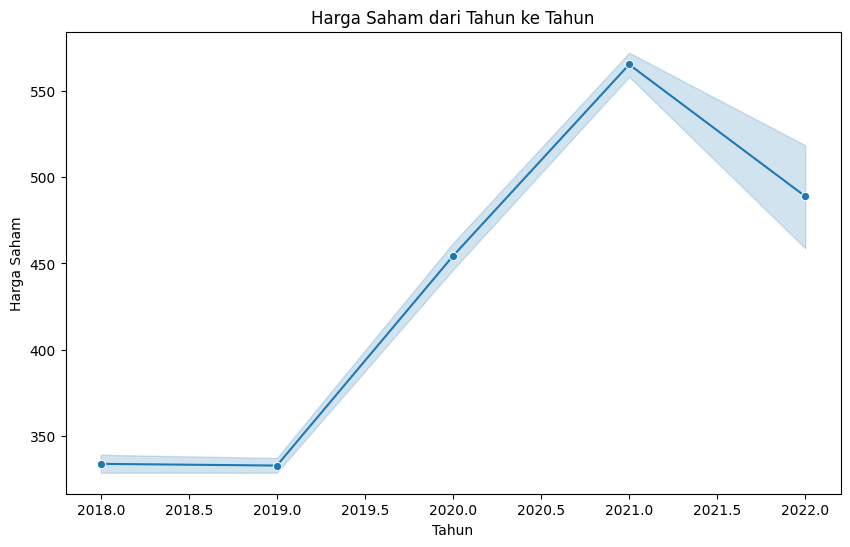

In [90]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='High', marker='o')
plt.title('Harga Saham dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham')
plt.show()


Pada visualisasi di atas, terlihat bahwa harga tertinggi saham Netflix cenderung meningkat dari tahun ke tahun, dengan puncak tertinggi terjadi pada tahun 2021. Hal ini menunjukkan bahwa kinerja saham Netflix mengalami pertumbuhan yang signifikan selama periode waktu yang diamati. Peningkatan harga saham Netflix dapat menjadi indikasi bahwa perusahaan mengalami pertumbuhan dan kemajuan yang kuat, yang mungkin disebabkan oleh strategi bisnis yang berhasil, peluncuran konten yang populer, atau peningkatan jumlah pelanggan. Investor dapat menginterpretasikan tren ini sebagai peluang untuk mendapatkan keuntungan dari investasi dalam saham Netflix, terutama jika tren pertumbuhan yang kuat tersebut berlanjut di masa depan.

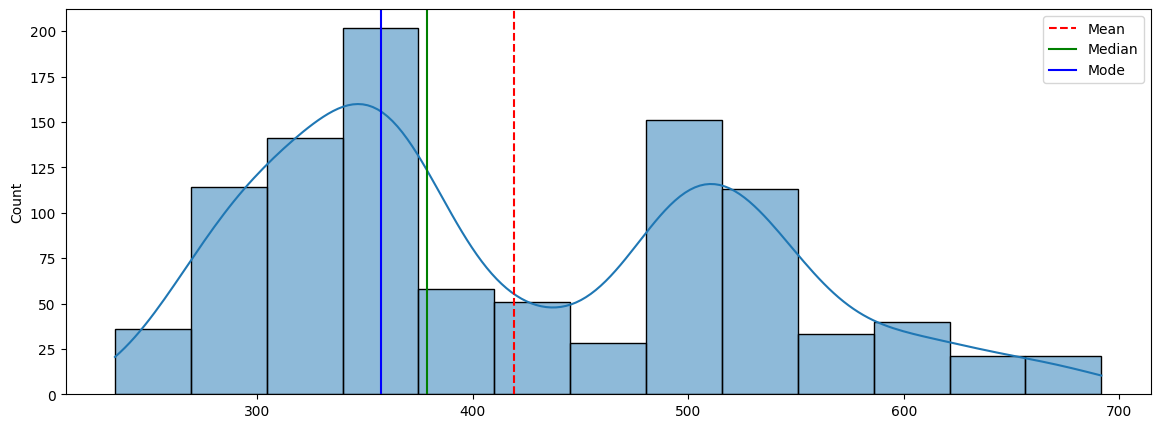

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))

# Mengambil nilai harga penutupan dari DataFrame harga saham
v_dist_1 = df["Close"].values

# Membuat histogram distribusi harga penutupan
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Menghitung rata-rata, median, dan modus harga penutupan
mean = df["Close"].mean()
median = df["Close"].median()
mode = df["Close"].mode().values[0]

# Menambahkan garis vertikal untuk menunjukkan rata-rata, median, dan modus
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

# Menambahkan legenda
ax1.legend()

# Menampilkan plot
plt.show()

Garis Vertikal:
- Garis putus-putus merah menunjukkan nilai rata-rata harga penutupan (Mean). nilai rata-rata dalam 5 tahun tersebut berada di sekitar 400-500.
- Garis solid hijau menunjukkan nilai median harga penutupan. nilai median dalam 5 tahun tersebut berada di sekitar 300-400.
- Garis solid biru menunjukkan nilai modus harga penutupan (nilai yang paling sering muncul). nilai modus dalam 5 tahun tersebut berada di sekitar 300-400.
Histogram:
- Sumbu horizontal pada histogram menunjukkan rentang nilai harga penutupan.
- Tinggi setiap sumbu menggambarkan jumlah hari (frekuensi) di mana harga penutupan berada dalam rentang nilai tersebut.
- Kurva berwarna biru mewakili perkiraan distribusi kepadatan kernel (KDE) dari data.
Interpretasi:
- Distribusi harga penutupan tampaknya agak miring ke kanan, dengan sebagian besar frekuensi terkonsentrasi pada harga penutupan yang lebih rendah.
- Rata-rata harga penutupan (garis putus-putus merah) terlihat sedikit lebih tinggi daripada median (garis solid hijau), menunjukkan adanya sedikit kemiringan ke kanan dalam distribusi.
- Modus (garis solid biru) tampaknya berada pada nilai yang lebih rendah daripada median, menunjukkan bahwa ada beberapa harga penutupan yang muncul lebih sering daripada yang lain.

Dengan memahami distribusi harga penutupan ini, investor dapat memperoleh wawasan yang lebih baik tentang perilaku harga saham Netflix dan menggunakannya sebagai dasar untuk pengambilan keputusan investasi.

##**Verify Data Quality**

####Missing Values

In [ ]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Dapat dilihat pada hasil diatas bahwa semua kolom bernilai false, yang dimana tidak ada nilai kosong pada setiap kolom tersebut.

####Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Adj Close,0.000000
Volume,5.649158


Dari hasil analisis sementara yang dilakukan, kualitas data tampaknya cukup baik karena persentase outliers yang rendah dan tidak adanya nilai kosong pada kolom-kolom "Open", "High", "Low", "Close", dan "Adj Close". Namun, pada kolom "Volume", terdapat sekitar 5.65% outliers.

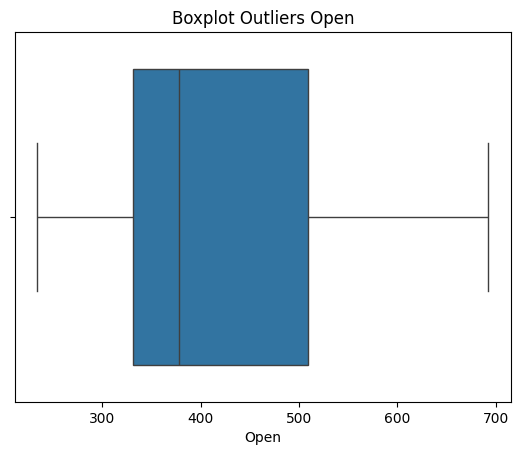

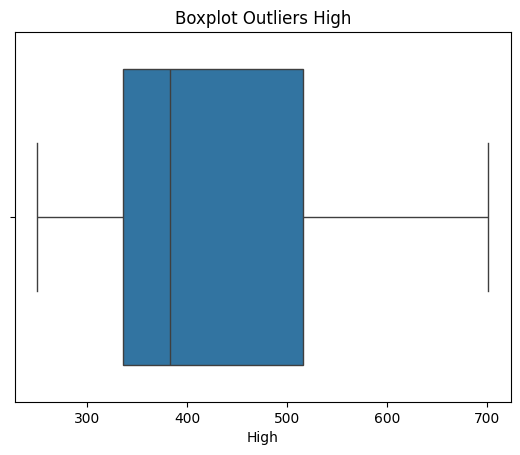

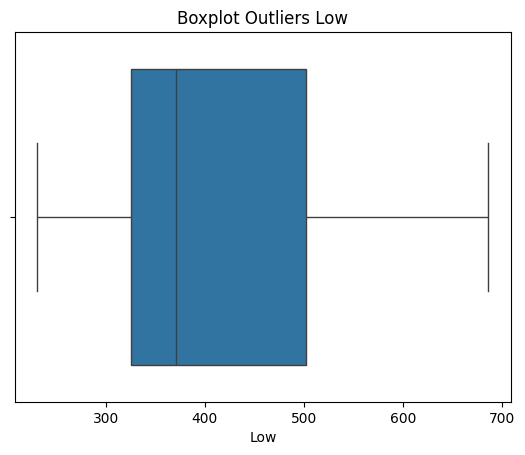

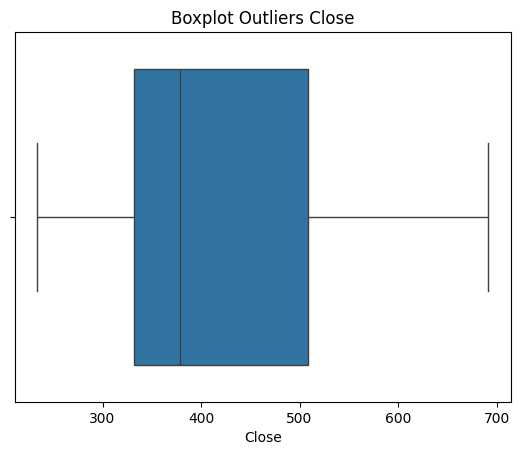

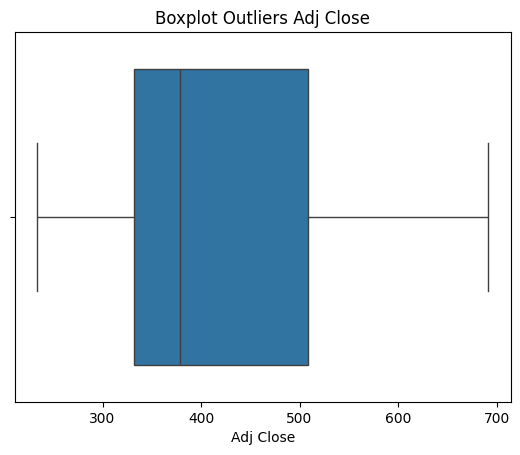

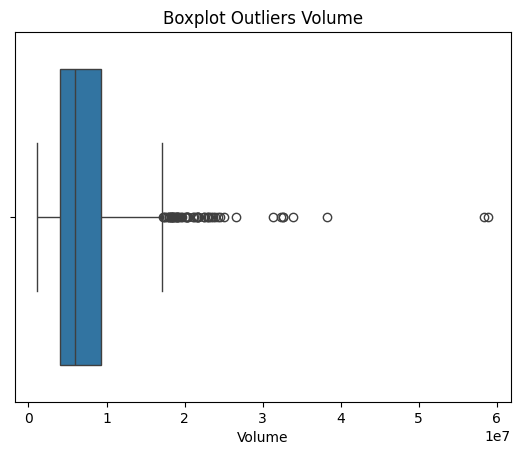

In [ ]:
columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

for col in columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot Outliers {col}")
    plt.show()

Dalam visualisasi boxplot untuk kolom Open, High, Low, dan Close, tidak ada titik-titik yang terletak di luar garis batas whisker, yang menunjukkan bahwa tidak ada outliers dalam data tersebut. Ini berarti bahwa rentang nilai dalam kolom-kolom ini relatif homogen, dan tidak ada nilai yang jauh dari mayoritas data.

Namun, pada kolom Volume, terdapat titik-titik yang terletak di luar garis batas whisker, terutama di bagian atas boxplot. Ini menunjukkan adanya outliers dalam data volume, yang berarti ada hari-hari atau periode waktu tertentu di mana volume perdagangan berada pada tingkat yang sangat tinggi atau rendah dibandingkan dengan mayoritas hari lainnya.

####Duplicated Values

In [ ]:
df[df.duplicated]

,Date,Open,High,Low,Close,Adj Close,Volume


dapat dilihat dari hasil diatas tidak terdapat data yang terduplicate

####Inconsistent Values / Noise

In [ ]:
# Mengecek rentang nilai dalam setiap kolom
for column in df.columns:
    if df[column].dtype != 'object':  # Mengecek hanya kolom numerik
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"Kolom '{column}': Rentang nilai dari {min_value} hingga {max_value}")


Kolom 'Open': Rentang nilai dari 233.919998 hingga 692.349976
Kolom 'High': Rentang nilai dari 250.649994 hingga 700.98999
Kolom 'Low': Rentang nilai dari 231.229996 hingga 686.090027
Kolom 'Close': Rentang nilai dari 233.880005 hingga 691.690002
Kolom 'Adj Close': Rentang nilai dari 233.880005 hingga 691.690002
Kolom 'Volume': Rentang nilai dari 1144000 hingga 58904300


Hasil data tersebut menunjukkan rentang nilai (range) untuk setiap kolom dalam dataset:
1. Kolom 'Open': Rentang nilai dari 233.919998 hingga 692.349976.
Ini menunjukkan bahwa nilai terendah dalam kolom 'Open' adalah sekitar 233.92, sementara nilai tertingginya adalah sekitar 692.35.
2. Kolom 'High': Rentang nilai dari 250.649994 hingga 700.98999.
Rentang nilai dalam kolom 'High' adalah antara 250.65 dan 700.99. Ini menunjukkan harga tertinggi saham yang dicapai dalam rentang waktu yang diamati.
3. Kolom 'Low': Rentang nilai dari 231.229996 hingga 686.090027.
Rentang nilai dalam kolom 'Low' adalah antara 231.23 dan 686.09. Ini menunjukkan harga terendah saham yang dicapai dalam rentang waktu yang diamati.
4. Kolom 'Close': Rentang nilai dari 233.880005 hingga 691.690002.
Rentang nilai dalam kolom 'Close' adalah antara 233.88 dan 691.69. Ini menunjukkan harga penutupan terendah dan tertinggi saham dalam rentang waktu yang diamati.
5. Kolom 'Adj Close': Rentang nilai dari 233.880005 hingga 691.690002.
Rentang nilai dalam kolom 'Adj Close' adalah antara 233.88 dan 691.69, yang serupa dengan kolom 'Close' karena keduanya mencerminkan harga penutupan yang disesuaikan.
6. Kolom 'Volume': Rentang nilai dari 1144000 hingga 58904300.
Ini menunjukkan jumlah volume perdagangan saham, dengan rentang dari sekitar 1,144,000 hingga 58,904,300. Ini menunjukkan tingkat aktivitas perdagangan saham dalam rentang waktu yang diamati.

Rentang nilai ini memberikan gambaran tentang variasi harga saham dan volume perdagangan selama periode waktu tertentu yang diamati dalam dataset.

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekan Missing Values**

In [ ]:
pd.DataFrame(df.isna().any() / len(df) * 100)

,0
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0


dari hasil persentase diatas dapat dilihat, bahwa data yang akan kita analisis sudah tidak memiliki nilai kosong, sehingga kita tidak perlu melakukan Cleaning Data.

###**Penanganan Duplicated Values**

#####**Pengecekan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


Dapat dilihat pada hasil persentase diatas, bahwa data yang akan kita analisis tidak memiliki nilai yang duplikat

###**Penanganan Outliers**

#####**Pengecekan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Adj Close,0.000000
Volume,5.649158


Dari hasil diatas, kita dapat melihat bahwa kolom Open, High, Low, dan Close tidak memiliki outliers, yang berarti tidak ada nilai yang jauh dari mayoritas data. Namun, kolom Volume memiliki 5.65% outliers, yang menunjukkan adanya beberapa nilai yang sangat berbeda dari mayoritas volume perdagangan. Outliers ini mungkin mencerminkan peristiwa luar biasa atau anomali dalam perdagangan saham yang perlu diperhatikan lebih lanjut dalam analisis.

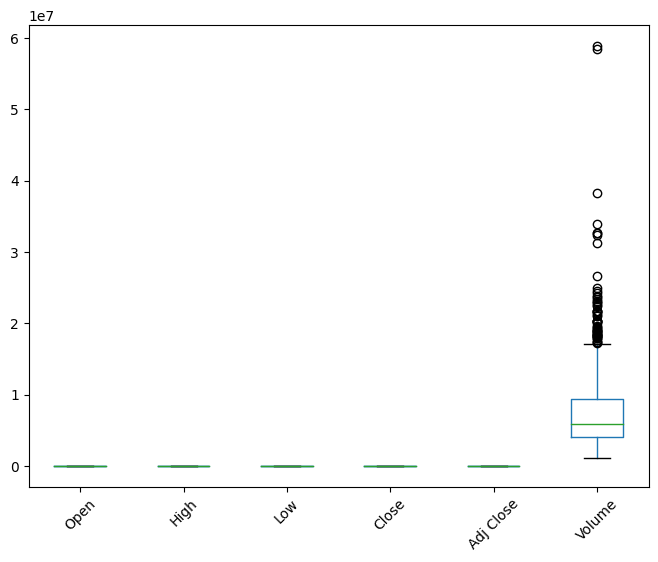

In [ ]:
boxplot = df.drop('Date', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Kolom 'Date' dihapus dari DataFrame sebelum menggambar boxplot karena kolom ini merupakan identifier unik. Identifier semacam itu tidak memberikan informasi yang relevan atau bermanfaat dalam analisis distribusi nilai variabel lainnya seperti 'Open', 'High', 'Low', 'Close', Adj close atau Volume. kolom date dihapus agar data numerik pada kolom-kolom lain lebih mudah dilihat dan di pahami

#####**Hapus Outliers**

Kolom 'Volume' pada dataset harga saham tidak dihapus meskipun terdapat outliers karena outliers tersebut sering mencerminkan peristiwa atau tren khusus yang berpengaruh signifikan pada aktivitas perdagangan, seperti pengumuman berita penting atau perubahan kebijakan perusahaan. Volume perdagangan yang tinggi atau rendah dapat memberikan informasi berharga tentang minat investor dan aktivitas pasar. Outliers dalam volume perdagangan juga memiliki keterkaitan yang erat dengan pergerakan harga saham, sehingga keberadaan mereka dapat memberikan wawasan tambahan dalam analisis harga saham. Jika outliers tersebut konsisten dengan pola historis dan memiliki potensi untuk memberikan informasi tambahan tentang dinamika pasar, maka biasanya lebih baik mempertahankan outliers tersebut dalam dataset untuk mendukung pengambilan keputusan investasi yang lebih baik.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [91]:
def categorize_volume(volume):
    if volume < 1000000:
        return 'Low Volume'
    elif 1000000 <= volume < 5000000:
        return 'Medium Volume'
    else:
        return 'High Volume'

df['VolumeCategory'] = df['Volume'].apply(categorize_volume)

Fungsi categorize_volume akan mengkategorikan volume perdagangan saham Netflix menjadi tiga kategori: 'Low Volume', 'Medium Volume', dan 'High Volume' berdasarkan nilai volume yang diberikan. Setelah itu, kolom baru 'VolumeCategory' akan ditambahkan ke DataFrame df yang berisi kategori volume untuk setiap baris data. kolom volume dibagi menjadi bebetapa kategori agar para analis lebih mudah menganalisis data yang ada nantinya

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumeCategory
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,High Volume
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,High Volume
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,High Volume
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,High Volume
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,High Volume


Dapat dilihat pada hasil diatas, kolom volume telah berhasil dikategorikan menjadi 3 macam kategori.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

Dalam dataset prediksi harga saham yang hanya terdiri dari kolom 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', dan 'Volume', semua kolom tersebut memiliki potensi untuk memberikan informasi yang berharga dalam analisis prediksi harga saham. jadi lebih baik tidak mengurangi fitur-fitur yang ada

#**Data Transformation**

###**Mapping**

Dalam kasus dataset prediksi harga saham netflix ini, kita dapat langsung melanjutkan proses analisis atau pemodelan tanpa perlu melakukan mapping terhadap kolom kategorikal. karena kolom yang dibutuhkan untuk dianalisis sudah bersifat numerik. Data yang sudah bersifat numerik siap untuk digunakan dalam berbagai algoritma machine learning tanpa perlu transformasi tambahan.

###**Encoding**

In [92]:
df = pd.get_dummies(df)

Fungsi ini berguna untuk mengubah kategori baris menjadi kolom

###**Pengecekkan Hasil**

In [93]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,VolumeCategory_High Volume,VolumeCategory_Medium Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,1,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,1,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,1,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,1,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,1,0


Dapat dilihat pada hasil diatas, kategory dari kolom volume yang sebelumnya adalah baris berubah menjadi kolom. Dengan menggunakan metode ini, kolom kategori, seperti kolom 'Volume', dipecah menjadi beberapa kolom biner baru, di mana setiap nilai kategori yang mungkin dipresentasikan sebagai kolom tersendiri, dan setiap baris dalam kolom tersebut diberi nilai 1 atau 0 sesuai dengan nilai kategori yang sesuai.

In [94]:
df.to_csv('Data_Cleaned.csv', index=False)
files.download('Data_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>